In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn import linear_model
from regress2 import regress2
import seaborn as sns

from sklearn import decomposition as decomp
from sklearn import preprocessing as prep
from sklearn import manifold as mfold

In [161]:
dst = '../hpcc/traditional/results/'
dst = '../../webpage/walnuts/figs/'
dst = '../../writing/walnut_figs/'

col_names = ['bname', 'wname',
             'nut_length','nut_height', 'nut_width',
             'nut_vol',
             'nut_va3d',
             'nut_ratio_feret',
             'nut_inv_ratio_feret',
             'nut_area',
             'nut_sphericity',
             'nut_cnvx_area',
             'nut_cnvx_vol',
             'nut_ratio_cnvx_area',
             'nut_ratio_cnvx_vol',
             'nut_inv_ratio_cnvx_area',
             'nut_inv_ratio_cnvx_vol',
             'krumbein',
             'corey',
             'sneed',
             'janke',
             'wadell',
             'air_vol', 'meat_vol', 'shell_vol', 'vein_vol',
             'air_ratio_vol', 'meat_ratio_vol', 'shell_ratio_vol', 'vein_ratio_vol',
             'shell_rugosity',
             'shell_thickness1','shell_thickness2','shell_thickness3','shell_thickness4',
             'shell_ext_ratio', 'shell_thick_ratio', 'shell_prot_ratio',
             'shell_ext_vol', 'shell_thick_vol', 'shell_prot_vol',
             'meat_length', 'meat_height', 'meat_width',
             'meat_area',
             'meat_cnvx_vol',
             'meat_cnvx_area',
             'meat_ratio_cnvx_area',
             'meat_inv_ratio_cnvx_area',
             'meat_ratio_cnvx_vol',
             'meat_inv_ratio_cnvx_vol']

col_labels =['Batch Name', 'Scan Name',
             'Nut Length','Nut Height', 'Nut Width',
             'Nut Volume',
             'Nut VA3D',
             'Nut Feret Ratio',
             'Nut Inverse Feret Ratio',
             'Nut Surface Area',
             'Nut Sphericity',
             'Nut Convex Surface Area',
             'Nut Convex Volume',
             'Nut Convex Area Ratio',
             'Nut Convex Volume Ratio',
             'Nut Convex Area Inverse Ratio',
             'Nut Convex Volume Inverse Ratio',
             'Krumbein Index',
             'Corey Index',
             'Sneed Index',
             'Janke Index',
             'Wadell Index',
             'Air Volume', 'Kernel Volume', 'Shell Volume', 'Packing Volume',
             'Air Volume Ratio', 'Kernel Volume Ratio', 'Shell Volume Ratio', 'Packing Volume Ratio',
             'Shell Rugosity',
             'Shell Thickness','Shell Thickness2','Shell Thickness3','Shell Thickness4',
             'External Shell Ratio', 'Bulge Shell Ratio', 'Protruding Shell Ratio',
             'External Shell Volume', 'Bulge Shell Volume', 'Protruding Shell Volume',
             'Kernel Length', 'Kernel Height', 'Kernel Width',
             'Kernel Surface Area',
             'Kernel Convex Volume',
             'Kernel Convex Surface Area',
             'Kernel Convex Area Ratio',
             'Kernel Convex Area Inverse Ratio',
             'Kernel Convex Volume Ratio',
             'Kernel Convex Volume Inverse Ratio']

col_units = ['', '',
             ' [mm]',' [mm]', ' [mm]',
             ' [mm$^3$]',
             '',
             '',
             '',
             ' [mm$^2$]',
             '',
             ' [mm$^2$]',
             ' [mm$^3$]',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             ' [%]', ' [%]', ' [%]', ' [%]',
             '',
             ' [mm]',' [mm]',' [mm]',' [mm]',
             ' [%]', ' [%]', ' [%]',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             ' [mm]', ' [mm]', ' [mm]',
             ' [mm$^2$]',
             ' [mm$^3$]',
             ' [mm$^2$]',
             '',
             '',
             '',
             '']

filename = '../hpcc/traditional/traditional_phenotypes.csv'
data = pd.read_csv(filename, header=None, dtype={1:str}, names=col_names)
data.loc[data['bname'] == '201SBa_R5_T55', 'bname'] = '2014SBa_R5_T55'
print(data.shape)
data.head()

(1301, 51)


bname wname  nut_length  nut_height  nut_width       nut_vol  \
0  2008SB_R4_T13   001   41.750477   33.582913  31.395051  20387.149371   
1  2008SB_R4_T13   002   39.720443   33.450554  31.454860  20512.900734   
2  2008SB_R4_T13   003   42.790987   35.768852  33.257804  24394.576769   
3  2008SB_R4_T13   004   39.589858   34.400643  31.931823  21020.676969   
4  2008SB_R4_T13   005   38.284326   34.049830  31.365337  19995.849647   

   nut_va3d  nut_ratio_feret  nut_inv_ratio_feret     nut_area  ...  \
0  4.941865         1.329843             0.751969  6147.314265  ...   
1  4.643222         1.262776             0.791906  6045.635968  ...   
2  4.596968         1.286645             0.777215  6763.478980  ...   
3  4.496373         1.239825             0.806566  6079.521052  ...   
4  4.335537         1.220594             0.819274  5809.316020  ...   

   meat_length  meat_height  meat_width    meat_area  meat_cnvx_vol  \
0    31.762844    28.371963   20.810690  6130.273789   10658.298930   
1    32.788899    27.734060   23.007246  6179.125457   11415.246424   
2    34.354962    29.135261   23.114041  6770.011739   13023.165953   
3    32.636524    28.850349   23.129211  6603.916065   11822.113691   
4    30.290693    27.548723   23.052005  6213.425320   10610.224955   

   meat_cnvx_area  meat_ratio_cnvx_area  meat_inv_ratio_cnvx_area  \
0     2473.436202              0.403479                  2.478444   
1     2572.442636              0.416312                  2.402046   
2     2828.536677              0.417804                  2.393468   
3     2618.373004              0.396488                  2.522145   
4     2446.843283              0.393799                  2.539364   

   meat_ratio_cnvx_vol  meat_inv_ratio_cnvx_vol  
0             1.783503                 0.560694  
1             1.774842                 0.563430  
2             1.799651                 0.555663  
3             1.708197                 0.585413  
4             1.742377                 0.573929  

[5 rows x 51 columns]

In [3]:
filename = '../all_phenos_for_Erik_221024.csv'
attr = pd.read_csv(filename)
print(attr.shape)

(720, 20)


In [4]:
cattraits = np.zeros((len(data), 15)) - 1
UCACCSD = []

for i in range(len(cattraits)):
    locate, Rrow, Ttree = data.iloc[i,0].split('_')
    row = int(Rrow[1:])
    tree = int(Ttree[1:])
    
    if locate == 'NewStuke':
        locate = 'New Stuke'
    #elif locate in ['SelectC','SelectD','SelectF']:
    elif locate in ['SelectD']:
        locate = 'Select Davis'

    metadf = attr[(attr['LOCATE']==locate) & (attr['ROW']==row) & (attr['TREE']==tree)]
    if len(metadf) > 0:
        meta = metadf.iloc[0]
        cattraits[i] = meta.iloc[5:].values.astype(float)
        UCACCSD.append(metadf.iloc[0,0])
    else:
        #print(data.iloc[i,0])
        UCACCSD.append('')
        pass

foo = pd.DataFrame(cattraits, columns=attr.columns[5:])

In [5]:
uc = pd.DataFrame(UCACCSD, columns=['UCACCSD'])

In [6]:
df = pd.concat([uc, data, foo], axis=1)
print(df.shape)
df.head()

(1301, 67)


UCACCSD          bname wname  nut_length  nut_height  nut_width  \
0  06-005-27  2008SB_R4_T13   001   41.750477   33.582913  31.395051   
1  06-005-27  2008SB_R4_T13   002   39.720443   33.450554  31.454860   
2  06-005-27  2008SB_R4_T13   003   42.790987   35.768852  33.257804   
3  06-005-27  2008SB_R4_T13   004   39.589858   34.400643  31.931823   
4  06-005-27  2008SB_R4_T13   005   38.284326   34.049830  31.365337   

        nut_vol  nut_va3d  nut_ratio_feret  nut_inv_ratio_feret  ...  \
0  20387.149371  4.941865         1.329843             0.751969  ...   
1  20512.900734  4.643222         1.262776             0.791906  ...   
2  24394.576769  4.596968         1.286645             0.777215  ...   
3  21020.676969  4.496373         1.239825             0.806566  ...   
4  19995.849647  4.335537         1.220594             0.819274  ...   

   ShellThickness  PackingTissue  KernelFill  %TipShrivel  %MinorShrivel  \
0             1.5            6.0         5.0          0.0            0.0   
1             1.5            6.0         5.0          0.0            0.0   
2             1.5            6.0         5.0          0.0            0.0   
3             1.5            6.0         5.0          0.0            0.0   
4             1.5            6.0         5.0          0.0            0.0   

   %MajorShrivel  Plumpness  EaseOfRemoval  PercentKernel  %Blank  
0            0.0        4.0            6.0      48.389312     0.0  
1            0.0        4.0            6.0      48.389312     0.0  
2            0.0        4.0            6.0      48.389312     0.0  
3            0.0        4.0            6.0      48.389312     0.0  
4            0.0        4.0            6.0      48.389312     0.0  

[5 rows x 67 columns]

In [7]:
j = 27
kratio = data.iloc[:,j].values
q25,q50,q75 = np.quantile(kratio, [0.25,.5,0.75])
print(q25,q50,q75, sep='\t')
iqr = q75 - q25
floor = q25-2*iqr
print(floor)
nonemptyk = np.where(kratio > floor)[0]

df = df.iloc[nonemptyk, :]
print(df.shape)

0.3074069767799232	0.3428250919670407	0.3714665882052332
0.17928775392930313
(1264, 67)


# READ CSV

In [3]:
scol_labels = np.asarray(col_labels, dtype=str)
filename = '../hpcc/traditional/traditional_phenotypes_merged.csv'
df = pd.read_csv(filename, dtype={1:str})
print(df.shape)
df.head()

(1264, 66)


bname wname  nut_length  nut_height  nut_width       nut_vol  \
0  2008SB_R4_T13   001   41.750477   33.582913  31.395051  20387.149371   
1  2008SB_R4_T13   002   39.720443   33.450554  31.454860  20512.900734   
2  2008SB_R4_T13   003   42.790987   35.768852  33.257804  24394.576769   
3  2008SB_R4_T13   004   39.589858   34.400643  31.931823  21020.676969   
4  2008SB_R4_T13   005   38.284326   34.049830  31.365337  19995.849647   

   nut_va3d  nut_ratio_feret  nut_inv_ratio_feret     nut_area  ...  \
0  4.941865         1.329843             0.751969  6147.314265  ...   
1  4.643222         1.262776             0.791906  6045.635968  ...   
2  4.596968         1.286645             0.777215  6763.478980  ...   
3  4.496373         1.239825             0.806566  6079.521052  ...   
4  4.335537         1.220594             0.819274  5809.316020  ...   

   ShellThickness  PackingTissue  KernelFill  %TipShrivel  %MinorShrivel  \
0             1.5            6.0         5.0          0.0            0.0   
1             1.5            6.0         5.0          0.0            0.0   
2             1.5            6.0         5.0          0.0            0.0   
3             1.5            6.0         5.0          0.0            0.0   
4             1.5            6.0         5.0          0.0            0.0   

   %MajorShrivel  Plumpness  EaseOfRemoval  PercentKernel  %Blank  
0            0.0        4.0            6.0      48.389312     0.0  
1            0.0        4.0            6.0      48.389312     0.0  
2            0.0        4.0            6.0      48.389312     0.0  
3            0.0        4.0            6.0      48.389312     0.0  
4            0.0        4.0            6.0      48.389312     0.0  

[5 rows x 66 columns]

In [11]:
np.sum(new_df.iloc[:,11].values > new_df.iloc[:,5].values)

1264

In [162]:
droptraits = [8,14,15,18,20,21,32,33,34,48,49]
droptraits = np.asarray(droptraits)
mask = np.ones(len(scol_labels), np.bool)
mask[droptraits] = 0
new_col_labels = scol_labels[mask]
new_col_units = np.asarray(col_units)[mask]
new_df = df.drop(df.columns[droptraits], 1)

himalaya = 'NewStuke_R1_T18'
interest = new_df[df.bname == himalaya]
other = new_df[df.bname != himalaya]

In [5]:
for i in range(2,len(new_col_labels)):
    print(i,new_col_labels[i],new_df.columns[i],sep='\t')

2	Nut Length	nut_length
3	Nut Height	nut_height
4	Nut Width	nut_width
5	Nut Volume	nut_vol
6	Nut VA3D	nut_va3d
7	Nut Feret Ratio	nut_ratio_feret
8	Nut Surface Area	nut_area
9	Nut Sphericity	nut_sphericity
10	Nut Convex Surface Area	nut_cnvx_area
11	Nut Convex Volume	nut_cnvx_vol
12	Nut Convex Area Ratio	nut_ratio_cnvx_area
13	Nut Convex Volume Inverse Ratio	nut_inv_ratio_cnvx_vol
14	Krumbein Index	krumbein
15	Sneed Index	sneed
16	Air Volume	air_vol
17	Kernel Volume	meat_vol
18	Shell Volume	shell_vol
19	Packing Volume	vein_vol
20	Air Volume Ratio	air_ratio_vol
21	Kernel Volume Ratio	meat_ratio_vol
22	Shell Volume Ratio	shell_ratio_vol
23	Packing Volume Ratio	vein_ratio_vol
24	Shell Rugosity	shell_rugosity
25	Shell Thickness	shell_thickness1
26	External Shell Ratio	shell_ext_ratio
27	Bulge Shell Ratio	shell_thick_ratio
28	Protruding Shell Ratio	shell_prot_ratio
29	External Shell Volume	shell_ext_vol
30	Bulge Shell Volume	shell_thick_vol
31	Protruding Shell Volume	shell_prot_vol
32	Kernel

In [109]:
rng = np.random.default_rng()

mmtraits = np.asarray(list(range(2,6)) + [8] + [10,11] + [16,17,18,19] + [25] + list(range(29,38)))
ols_m = np.ones((len(mmtraits), len(mmtraits)))
ols_b = ols_m.copy()
ols_r = ols_m.copy()
ols_p = ols_m.copy()
ols_R2 = ols_m.copy()

BB = 1000
bootstrap = np.zeros((BB,5))

for i in range(len(ols_m)):
    for j in range(len(ols_m)):        
        nonzero_i = set(np.nonzero(new_df.iloc[:,mmtraits[i]].values)[0])
        nonzero_j = set(np.nonzero(new_df.iloc[:,mmtraits[j]].values)[0])
        
        nonzero = np.asarray(list(nonzero_i & nonzero_j))
        
        trait_i = np.log(new_df.iloc[nonzero,mmtraits[i]].values)
        trait_j = np.log(new_df.iloc[nonzero,mmtraits[j]].values)
        
        for k in range(BB):
            bb = rng.choice(len(trait_i), len(trait_i))
            ti = trait_i[bb]
            tj = trait_j[bb]
    
            ols = stats.linregress(ti, tj)
        
            bootstrap[k] = [ols.slope, 
                            ols.intercept, 
                            ols.pvalue, 
                            ols.rvalue, 
                            r2_score(tj, ols.slope*ti + ols.intercept)]
        
        bmeans = np.mean(bootstrap, axis = 0)
        
        ols_m[i, j] = bmeans[0]
        ols_b[i, j] = bmeans[1]
        ols_p[i, j] = bmeans[2]
        ols_r[i, j] = bmeans[3]
        ols_R2[i,j] = bmeans[4]
        
print(ols_m.shape)

(21, 21)


In [110]:
foo = pd.DataFrame(ols_R2, columns=new_col_labels[mmtraits], index=new_col_labels[mmtraits])
foo
#foo['Kernel Volume'].sort_values(ascending=False)

Nut Length  Nut Height  Nut Width  Nut Volume  \
Nut Length                    1.000000    0.340017   0.399784    0.616928   
Nut Height                    0.338415    1.000000   0.755681    0.857617   
Nut Width                     0.400413    0.755643   1.000000    0.859365   
Nut Volume                    0.616779    0.857340   0.858812    1.000000   
Nut Surface Area              0.644041    0.826437   0.854044    0.968830   
Nut Convex Surface Area       0.655424    0.841643   0.856498    0.992938   
Nut Convex Volume             0.627889    0.856617   0.868541    0.996493   
Air Volume                    0.399220    0.654181   0.625044    0.740380   
Kernel Volume                 0.395657    0.549422   0.570309    0.649296   
Shell Volume                  0.436823    0.434973   0.462826    0.522061   
Packing Volume                0.473975    0.612787   0.625864    0.723326   
Shell Thickness               0.066170    0.021812   0.025387    0.027826   
External Shell Volume         0.450737    0.453052   0.473656    0.539631   
Bulge Shell Volume            0.079156    0.061141   0.102317    0.080502   
Protruding Shell Volume       0.062759    0.015569   0.021975    0.037071   
Kernel Length                 0.720507    0.300018   0.345842    0.544589   
Kernel Height                 0.269985    0.859533   0.622107    0.716522   
Kernel Width                  0.200565    0.566679   0.754156    0.618741   
Kernel Surface Area           0.454381    0.566113   0.589484    0.687991   
Kernel Convex Volume          0.494295    0.744630   0.752266    0.859283   
Kernel Convex Surface Area    0.526241    0.748824   0.754422    0.875210   

                            Nut Surface Area  Nut Convex Surface Area  \
Nut Length                          0.644711                 0.655514   
Nut Height                          0.826320                 0.842347   
Nut Width                           0.854060                 0.856031   
Nut Volume                          0.968623                 0.992947   
Nut Surface Area                    1.000000                 0.984753   
Nut Convex Surface Area             0.984661                 1.000000   
Nut Convex Volume                   0.982424                 0.998572   
Air Volume                          0.724255                 0.737022   
Kernel Volume                       0.600411                 0.628743   
Shell Volume                        0.533189                 0.537734   
Packing Volume                      0.701370                 0.718479   
Shell Thickness                     0.032311                 0.032164   
External Shell Volume               0.546670                 0.555662   
Bulge Shell Volume                  0.104008                 0.090769   
Protruding Shell Volume             0.040891                 0.038673   
Kernel Length                       0.522155                 0.551072   
Kernel Height                       0.670415                 0.694765   
Kernel Width                        0.599982                 0.600063   
Kernel Surface Area                 0.647074                 0.672631   
Kernel Convex Volume                0.809998                 0.841553   
Kernel Convex Surface Area          0.830385                 0.860975   

                            Nut Convex Volume  Air Volume  Kernel Volume  \
Nut Length                           0.627375    0.399512       0.395850   
Nut Height                           0.856409    0.651842       0.550456   
Nut Width                            0.868368    0.624489       0.570076   
Nut Volume                           0.996486    0.740548       0.648671   
Nut Surface Area                     0.982581    0.724843       0.601041   
Nut Convex Surface Area              0.998572    0.736479       0.630266   
Nut Convex Volume                    1.000000    0.740582       0.636992   
Air Volume                           0.740412    1.000000       0.216522   
Kernel Volume                        0.636

In [105]:
for i in range(0,len(mmtraits)):
    print(i,mmtraits[i],new_col_labels[mmtraits[i]], new_df.columns[mmtraits[i]],sep='\t')

0	2	Nut Length	nut_length
1	3	Nut Height	nut_height
2	4	Nut Width	nut_width
3	5	Nut Volume	nut_vol
4	8	Nut Surface Area	nut_area
5	10	Nut Convex Surface Area	nut_cnvx_area
6	11	Nut Convex Volume	nut_cnvx_vol
7	16	Air Volume	air_vol
8	17	Kernel Volume	meat_vol
9	18	Shell Volume	shell_vol
10	19	Packing Volume	vein_vol
11	25	Shell Thickness	shell_thickness1
12	29	External Shell Volume	shell_ext_vol
13	30	Bulge Shell Volume	shell_thick_vol
14	31	Protruding Shell Volume	shell_prot_vol
15	32	Kernel Length	meat_length
16	33	Kernel Height	meat_height
17	34	Kernel Width	meat_width
18	35	Kernel Surface Area	meat_area
19	36	Kernel Convex Volume	meat_cnvx_vol
20	37	Kernel Convex Surface Area	meat_cnvx_area


1933137.3227155663
77.2783840635655
154.556768127131


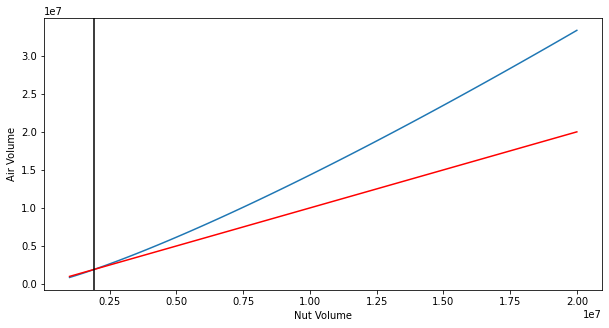

In [126]:
i = 3
j = 7

xrange = np.linspace(1e6, 2e7, 100)
bar = np.exp(-ols_b[i,j]/(ols_m[i,j]-1))
plt.figure(figsize=(10,5))

plt.plot(xrange, np.exp(ols_b[i,j])*np.power(xrange,ols_m[i,j]))
plt.plot(xrange, xrange, c='r');

plt.xlabel(new_col_labels[mmtraits[i]])
plt.ylabel(new_col_labels[mmtraits[j]])

plt.axvline(bar, c='k')
print(bar)
print(np.cbrt(3*bar/(4*np.pi)))
print(2*np.cbrt(3*bar/(4*np.pi)))

../../writing/walnut_figs/shell_thickness_allometry


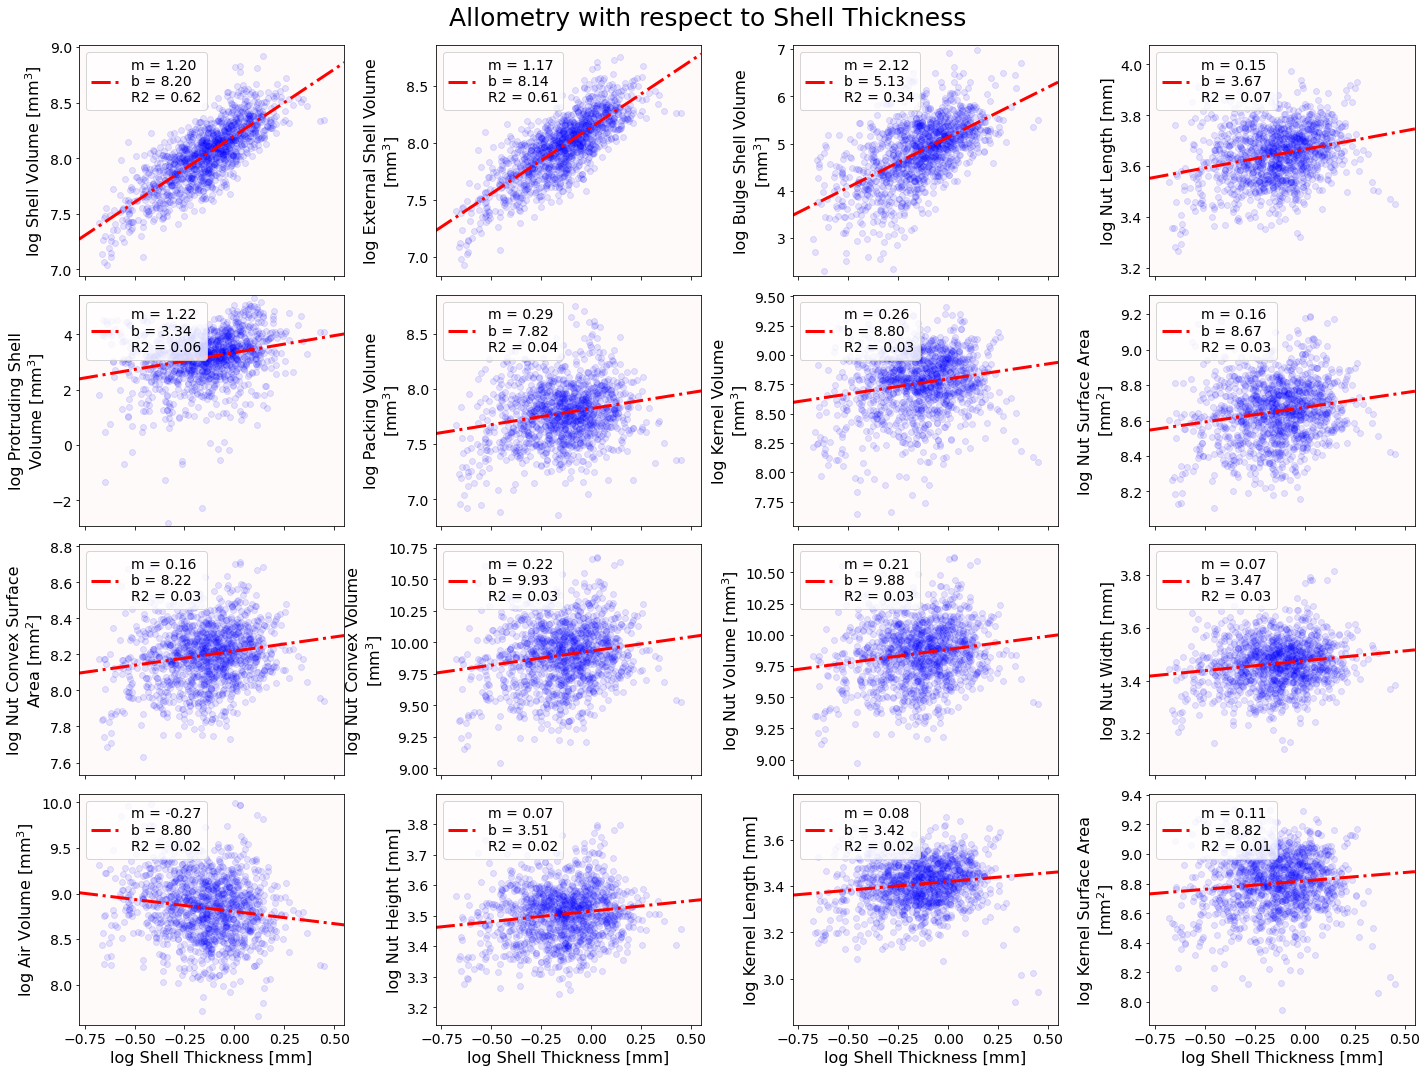

In [127]:
fs = 14
fig, ax = plt.subplots(4,4, figsize=(20,15), sharex=True)
ax = np.atleast_1d(ax).ravel()

i = 11
TRAIT_I = np.log(new_df.iloc[:,mmtraits[i]].values)
argsort = np.argsort(ols_R2[i])[::-1][1:]

for idx in range(len(ax)):
    j = mmtraits[argsort[idx]]
    nonzero = np.nonzero(new_df.iloc[:,j].values)[0]
    if len(nonzero) == len(df):
        trait_i = TRAIT_I.copy()
        trait_j = np.log(new_df.iloc[:,j].values)
    else:
        trait_i = np.log(new_df.iloc[nonzero,mmtraits[i]].values)
        trait_j = np.log(new_df.iloc[nonzero,j].values)
        
    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
    m = ols_m[i,argsort[idx]]
    r2 = ols_R2[i,argsort[idx]]
    b = ols_b[i,argsort[idx]]

    axlabel = 'm = {:.2f}\nb = {:.2f}\nR2 = {:.2f}'.format(m,b,r2)
    bar = ax[idx].axline(xy1=(0,b), slope=m, color='r', label=axlabel, ls='-.', lw=3)

    ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.1)
    ylabel = 'log ' + new_col_labels[j] + new_col_units[j]
    ax[idx].set_ylabel(textwrap.fill(ylabel,25), fontsize=fs+2);
    ax[idx].legend(loc='upper left', fontsize=fs)

for idx in range(len(ax)-4,len(ax)):
    ax[idx].set_xlabel('log ' + new_col_labels[mmtraits[i]] + new_col_units[mmtraits[i]], fontsize=fs+2);

fig.suptitle('Allometry with respect to ' + new_col_labels[mmtraits[i]], fontsize=25, y=.99)
fig.tight_layout()

filename = dst + new_col_labels[mmtraits[i]].lower().replace(' ','_') + '_allometry'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

../../writing/walnut_figs/individual_tissue_allometry


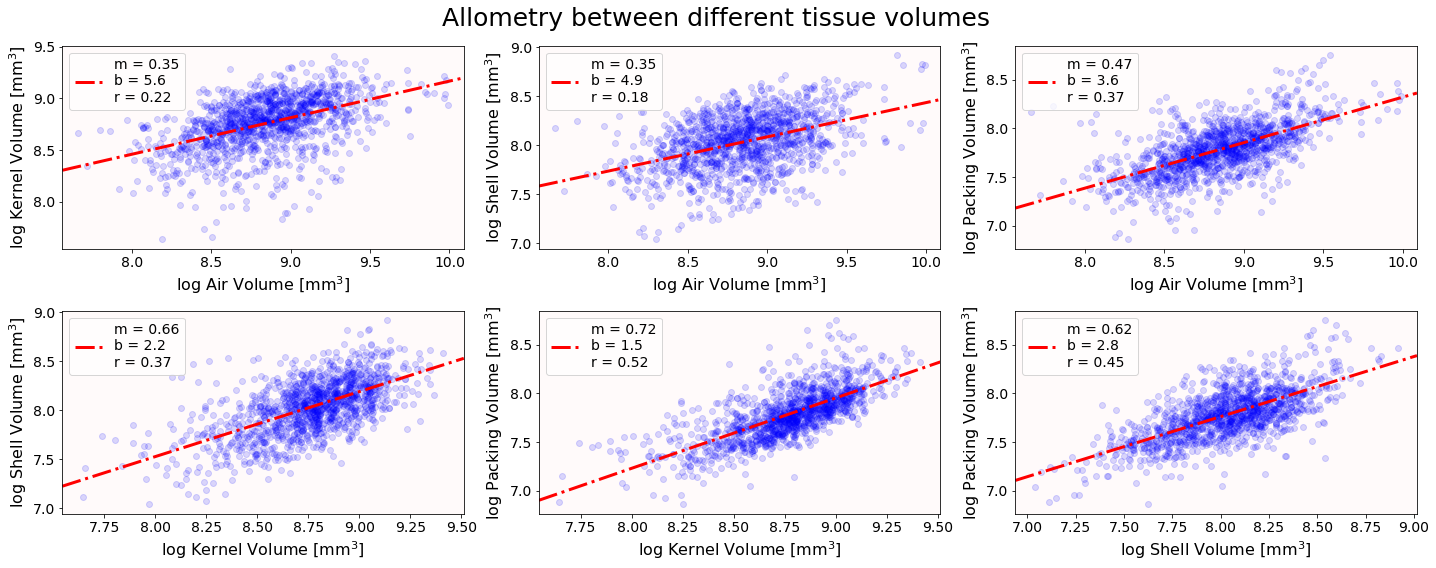

In [129]:
fs = 14
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = np.atleast_1d(ax).ravel()

idx = 0
for i in range(22,26):
    trait_i = np.log(df.iloc[:,i].values)
    for j in range(i+1, 26):
        trait_j = np.log(df.iloc[:,j].values)
        r,p = stats.pearsonr(trait_i, trait_j)

        ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
        ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
        ax[idx].set_facecolor('snow')
        ax[idx].tick_params(labelsize=fs)

        new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(trait_j, new_series(trait_i))
        axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r2)
        bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

        ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
        ax[idx].set_ylabel('log ' + col_labels[j] + col_units[j], fontsize=fs+2);
        ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);
        ax[idx].legend(loc='upper left', fontsize=fs)
        idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Allometry between different tissue volumes', fontsize=25)
fig.tight_layout()
filename = dst + 'individual_tissue_allometry'
print(filename)
#plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

In [134]:
feats = new_df.iloc[:,2:len(new_col_labels)].values.copy()

pcorrstat = np.ones((feats.shape[1], feats.shape[1]))
ppvalcorr = np.zeros_like(pcorrstat)

scorrstat = np.ones((feats.shape[1], feats.shape[1]))
spvalcorr = np.zeros_like(pcorrstat)

for i in range(len(pcorrstat)-1):
    for j in range(i+1, len(pcorrstat)):
        pstat, ppval = stats.pearsonr(feats[:,i], feats[:,j])
        sstat, spval = stats.spearmanr(feats[:,i], feats[:,j])
        
        pcorrstat[i,j] = pstat
        pcorrstat[j,i] = pstat
        ppvalcorr[i,j] = ppval
        ppvalcorr[j,i] = ppval
        
        scorrstat[i,j] = sstat
        scorrstat[j,i] = sstat
        spvalcorr[i,j] = spval
        spvalcorr[j,i] = spval

In [286]:
i = 21
foo = pd.DataFrame(pcorrstat, columns=new_col_labels[2:], index=new_col_labels[2:])
trait = 'Kernel Volume Ratio'
args = np.argsort(np.abs(foo[trait].values))[::-1]
foo[trait].iloc[args]

Kernel Volume Ratio                   1.000000
Kernel Convex Volume Inverse Ratio    0.841051
Air Volume Ratio                     -0.803313
Kernel Convex Area Ratio             -0.638091
Air Volume                           -0.574592
Kernel Volume                         0.368353
Nut Surface Area                     -0.261186
Kernel Surface Area                   0.261047
Nut Convex Volume                    -0.256490
Nut Convex Surface Area              -0.250393
Nut Volume                           -0.246589
Nut Convex Volume Inverse Ratio       0.226918
Nut Sphericity                        0.225068
Shell Rugosity                       -0.217147
Nut Height                           -0.215760
Nut VA3D                             -0.204104
Nut Width                            -0.194964
Nut Length                           -0.174823
Nut Convex Area Ratio                 0.169157
Packing Volume                       -0.159311
Shell Volume                         -0.159002
Bulge Shell V

(23,)
../../writing/walnut_figs/kernel_volume_ratio_hbar_correlation


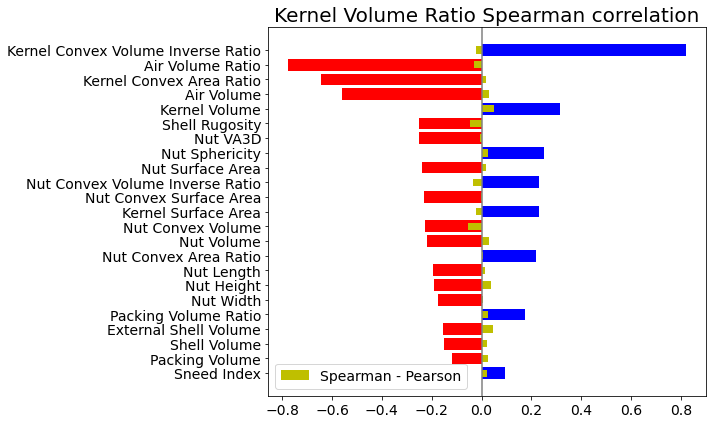

In [283]:
fs = 14
fig, ax = plt.subplots(1,1, figsize=(10,6), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
i = 21
#ax[idx].set_ylabel('PCA Loadings', fontsize=fs)

for idx,i in enumerate([21]):
    pval = spvalcorr[i-2]
    pval = np.hstack((pval[:i-2],pval[i-1:]))
    tags = np.hstack((new_col_labels[:i],new_col_labels[i+1:]))[2:]
    
    vals = scorrstat[i-2]
    diff = vals - pcorrstat[i-2]
    
    vals = np.hstack((vals[:i-2],vals[i-1:]))
    diff = np.hstack((diff[:i-2],diff[i-1:]))
    
    bonferroni = 0.05/len(vals)
    vals = vals[pval < bonferroni]
    diff = diff[pval < bonferroni]
    tags = tags[pval < bonferroni]
    
    print(vals.shape)
    
    sortarr = np.argsort(np.abs(vals))
    plus = np.where(vals[sortarr] > 0)[0]
    minus = np.where(vals[sortarr] < 0)[0]
    

    ax[idx].barh(plus, vals[sortarr][plus], color='b')
    ax[idx].barh(minus, vals[sortarr][minus], color='r')
    ax[idx].barh(sortarr, diff, color='y', label='Spearman - Pearson', height=0.5)
    ax[idx].legend(loc='lower left', fontsize=fs)
    
    ax[idx].axvline(0, c='gray')
    ax[idx].set_yticks(range(len(vals)))
    ax[idx].set_yticklabels(tags[sortarr]);
    ax[idx].tick_params('x', labelrotation=0, labelsize=fs);
    ax[idx].tick_params('y', labelsize=fs);
    ax[idx].set_title(new_col_labels[i] + ' Spearman correlation', fontsize=20)
    #ax[idx].set_aspect('equal')

#fig.suptitle('PCA Loadings', fontsize=25)
fig.tight_layout();

filename = dst + new_col_labels[i].lower().replace(' ','_') + '_hbar_correlation'
print(filename)
plt.savefig(filename + '.pdf', dpi=200, format='pdf', bbox_inches='tight')

../../writing/walnut_figs/kernel_volume_correlation


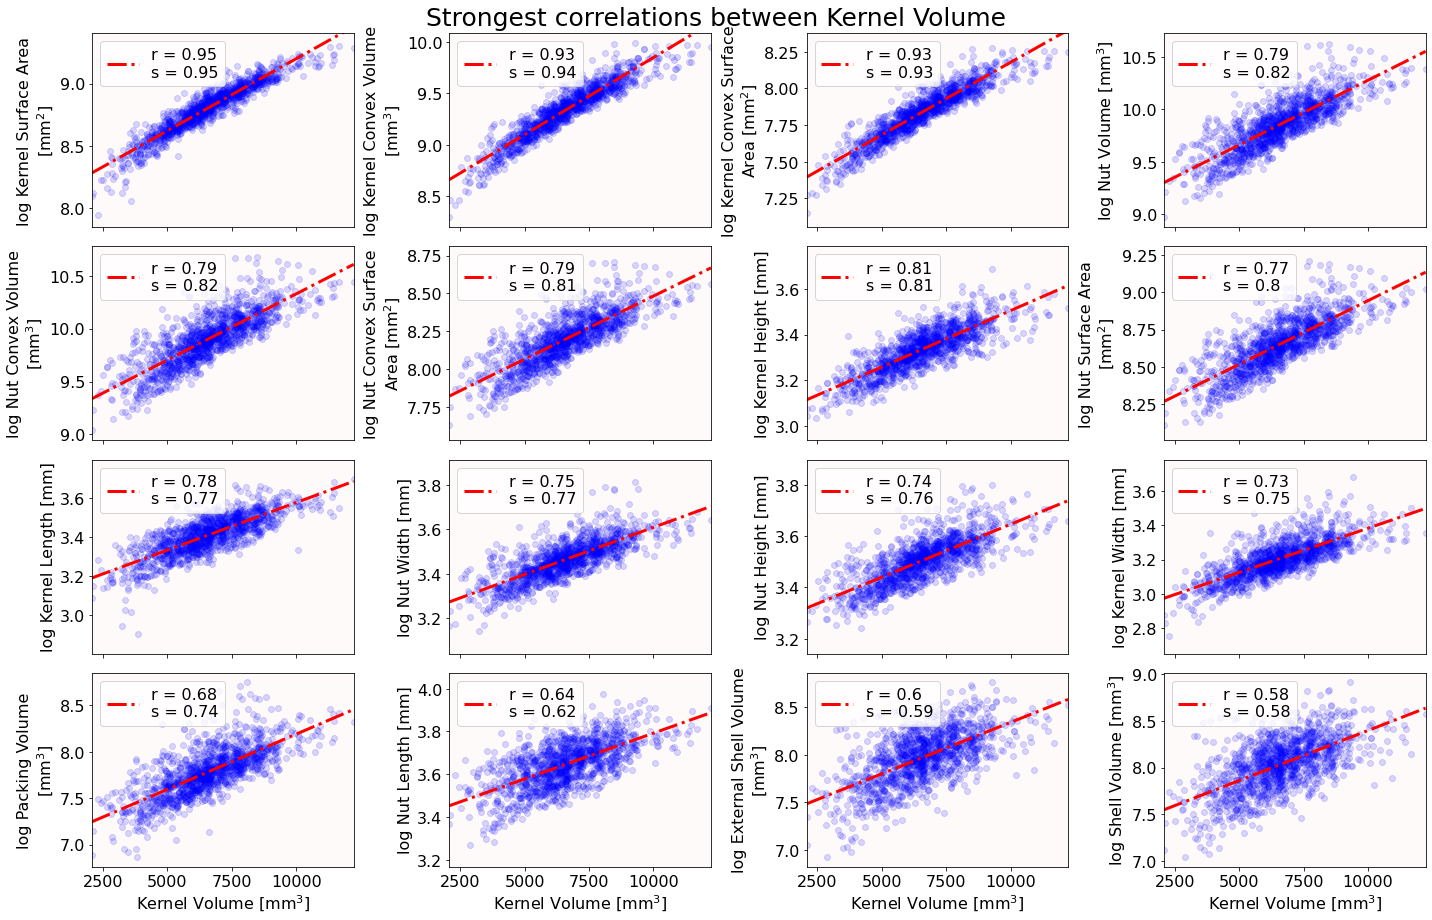

In [272]:
fs = 16
fig, ax = plt.subplots(4,4, figsize=(20,13), sharex=True)
ax = np.atleast_1d(ax).ravel()

idx = 0
i = 17
trait_i = (new_df.iloc[:,i].values)
xrange = np.linspace(np.min(trait_i)-0.1, np.max(trait_i)+0.1, 100)
args = np.argsort(np.abs(scorrstat[i-2]))[::-1][1:]

for idx in range(len(ax)):
    j = args[idx]
    s = scorrstat[i-2,j]
    
    if 'm' in new_col_units[j+2]:
        trait_j = np.log(new_df.iloc[:,j+2].values)
        ylabel = 'log ' + new_col_labels[j+2] + new_col_units[j+2]
        r,_ = stats.pearsonr(trait_i, trait_j)
    else:
        trait_j = (new_df.iloc[:,j+2].values)
        ylabel = new_col_labels[j+2] + new_col_units[j+2]
    r = pcorrstat[i-2,j]
    
    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)

    new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
    foo = new_series.convert().coef
    #r2 = r2_score(trait_j, new_series(trait_i))
    #axlabel = 'm = {:.2}\nb = {:.2}\ns = {:.2}'.format(foo[1], foo[0], s)
    axlabel = 'r = {:.2}\ns = {:.2}'.format(r,s)
    #bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)
    ax[idx].plot(xrange, new_series(xrange), color='r', label=axlabel, ls='-.', lw=3)

    ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
    
    ax[idx].set_ylabel(textwrap.fill(ylabel,25), fontsize=fs);
    if foo[1] > 0:
        ax[idx].legend(loc='upper left', fontsize=fs)
    else:
        ax[idx].legend(loc='upper right', fontsize=fs)
        
for idx in range(len(ax)-4,len(ax)):
    ax[idx].set_xlabel(new_col_labels[i] + new_col_units[i], fontsize=fs);

fig.suptitle('Strongest correlations between ' + new_col_labels[i], fontsize=25)
fig.tight_layout()
filename = dst + new_col_labels[i].lower().replace(' ','_') + '_correlation'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

../../writing/walnut_figs/individual_tissue_volume_relationship


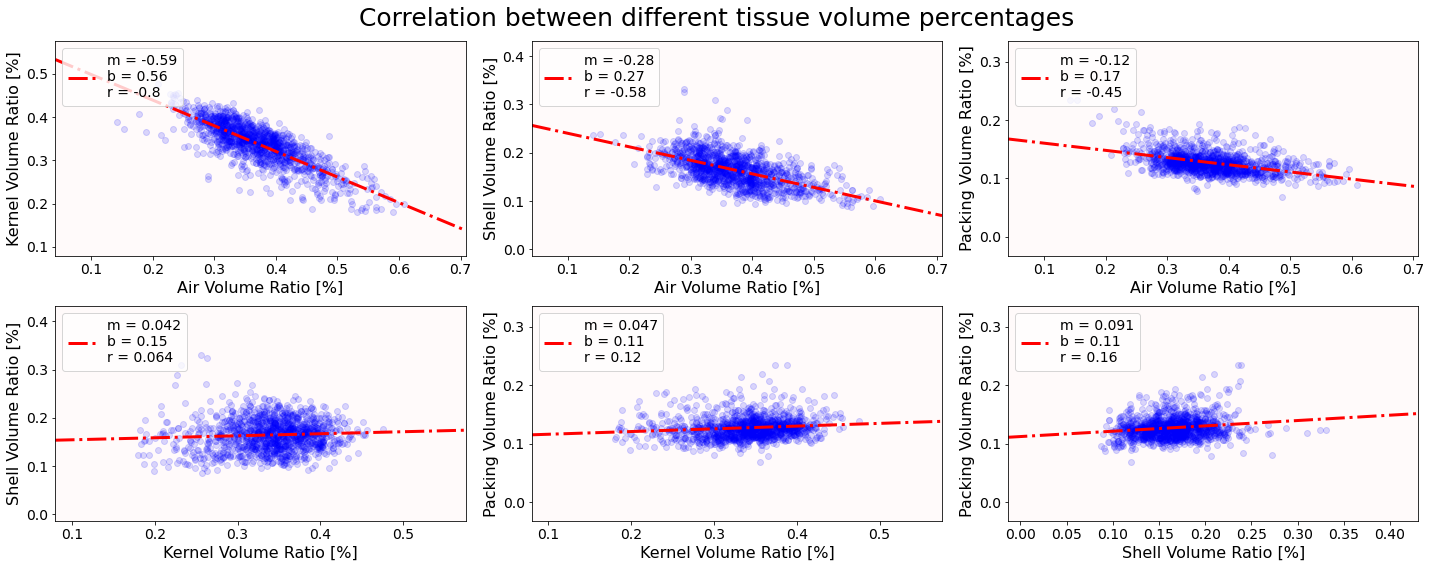

In [284]:
fs = 14
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = np.atleast_1d(ax).ravel()

idx = 0
for i in range(26,30):
    trait_i = (df.iloc[:,i].values)
    for j in range(i+1, 30):
        trait_j = (df.iloc[:,j].values)
        r,p = stats.pearsonr(trait_i, trait_j)

        ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
        ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
        ax[idx].set_facecolor('snow')
        ax[idx].tick_params(labelsize=fs)

        new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(trait_j, new_series(trait_i))
        axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
        bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

        ax[idx].scatter(trait_i, trait_j, color='b', alpha=0.15)
        ax[idx].set_ylabel(col_labels[j] + col_units[j], fontsize=fs+2);
        ax[idx].set_xlabel(col_labels[i] + col_units[i], fontsize=fs+2);
        ax[idx].legend(loc='upper left', fontsize=fs)
        idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);

fig.suptitle('Correlation between different tissue volume percentages', fontsize=25)
fig.tight_layout()
filename = dst + 'individual_tissue_volume_relationship'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

../../webpage/walnuts/figs/boxplots_vs_85-023-2


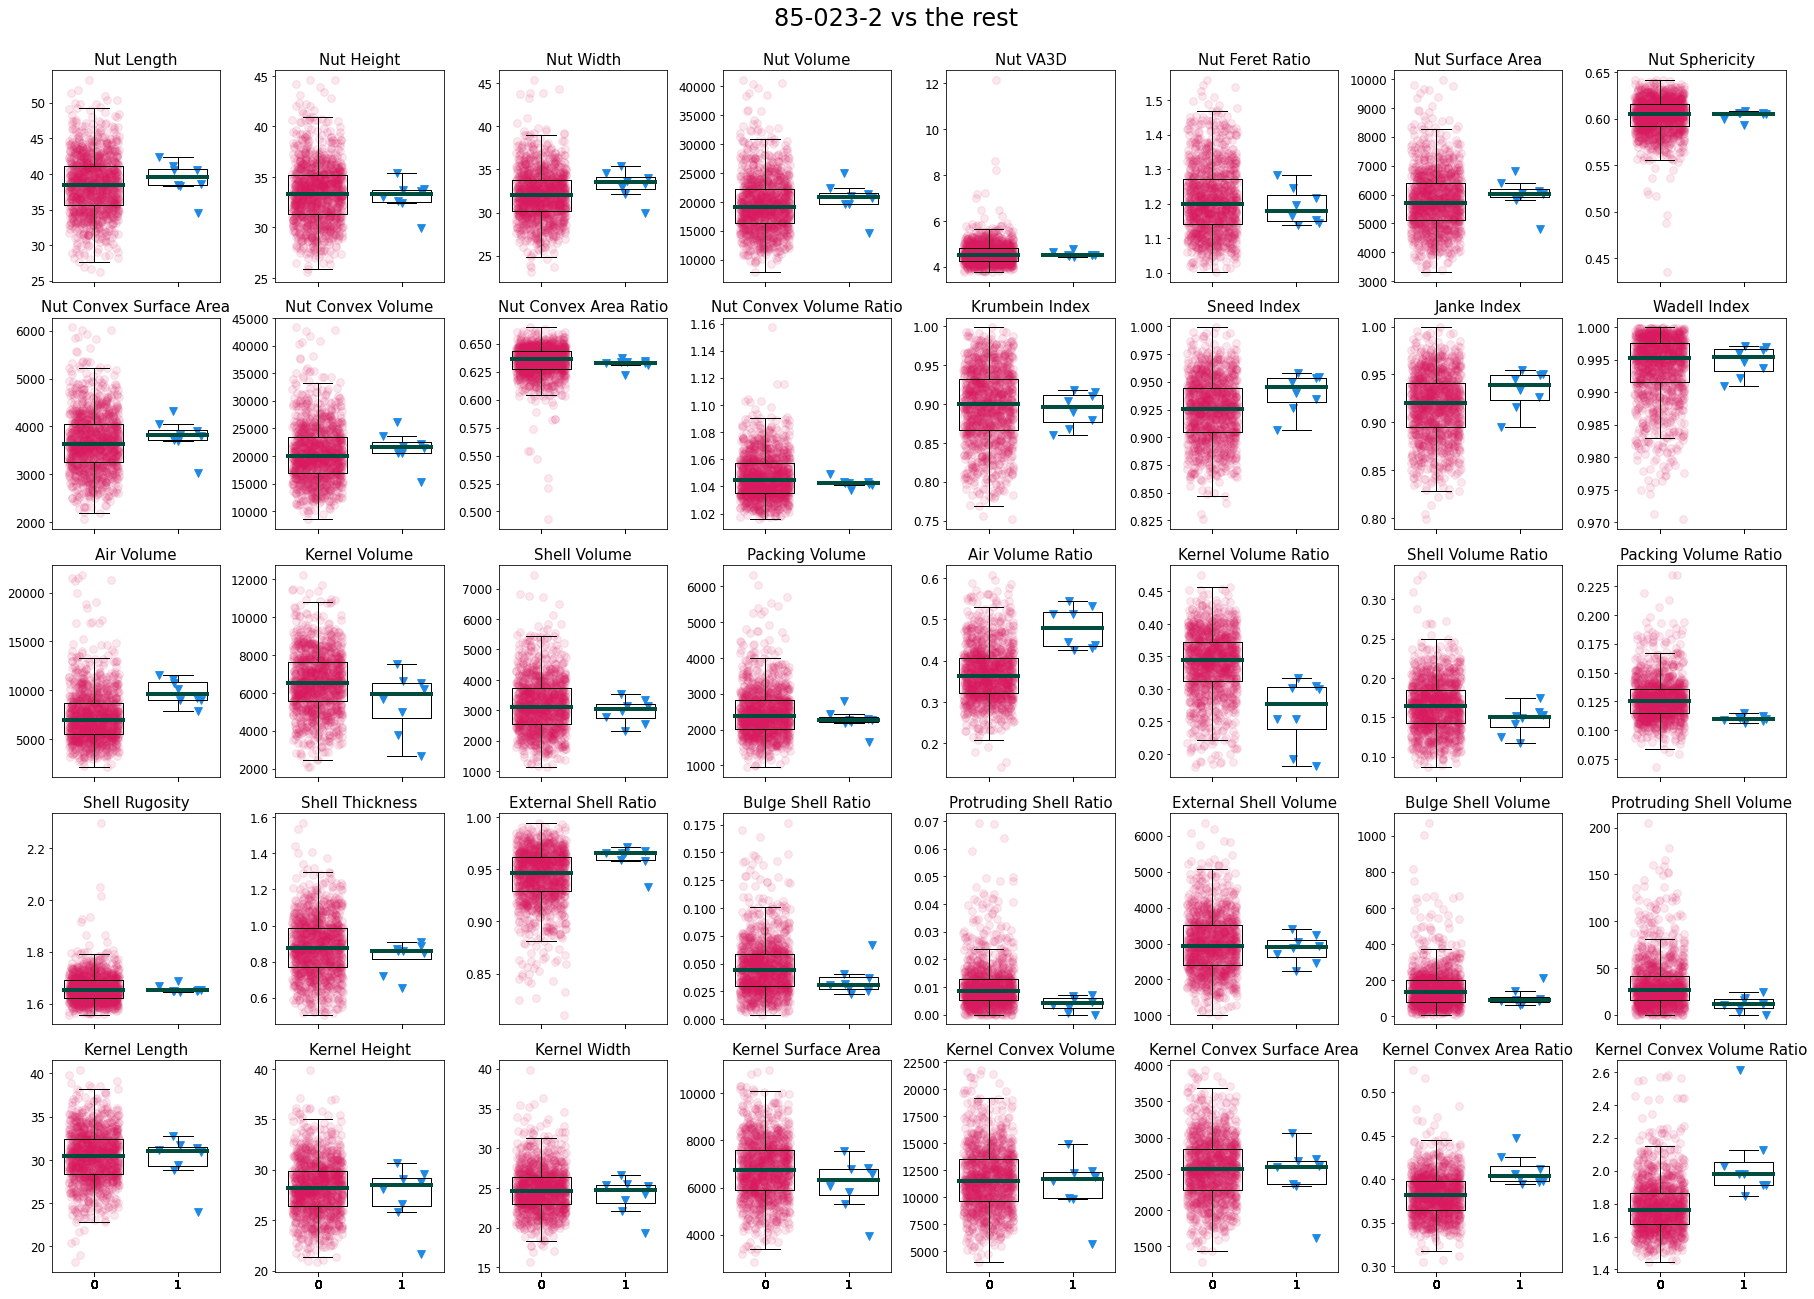

In [62]:
boxplot = [None, None]

xscatter = np.random.default_rng(12345).uniform(-1,1,len(df))*.3

fig, ax = plt.subplots(5,8, figsize=(25,18), sharex=True)
ax = np.atleast_1d(ax).ravel()
i = 0
for i in range(len(ax)):
    idx = i + 2
    boxplot[0] = other.iloc[:,idx].values
    boxplot[1] = interest.iloc[:,idx].values

    ax[i].scatter(xscatter[:len(other)], boxplot[0], color=col_wong[0], marker=marker[0], s=60, alpha=0.1)
    ax[i].scatter(xscatter[len(other):]+1, boxplot[1], color=col_wong[1], marker=marker[1], s=60, alpha=1)
    ax[i].boxplot(boxplot, notch=False, sym='', vert=True, positions=range(2), widths=0.7,
                            medianprops = {'color':col_wong[-2], 'lw':4})
    ax[i].set_title(new_col_labels[idx], fontsize=fs)
    ax[i].tick_params(labelsize=12)

#ax[i].set_xticks(range(2))
#ax[i].set_xticklabels(['Other', 'Early'])
fig.suptitle("85-023-2 vs the rest", fontsize=24, y=1)
fig.tight_layout()

filename = dst + 'boxplots_vs_85-023-2'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

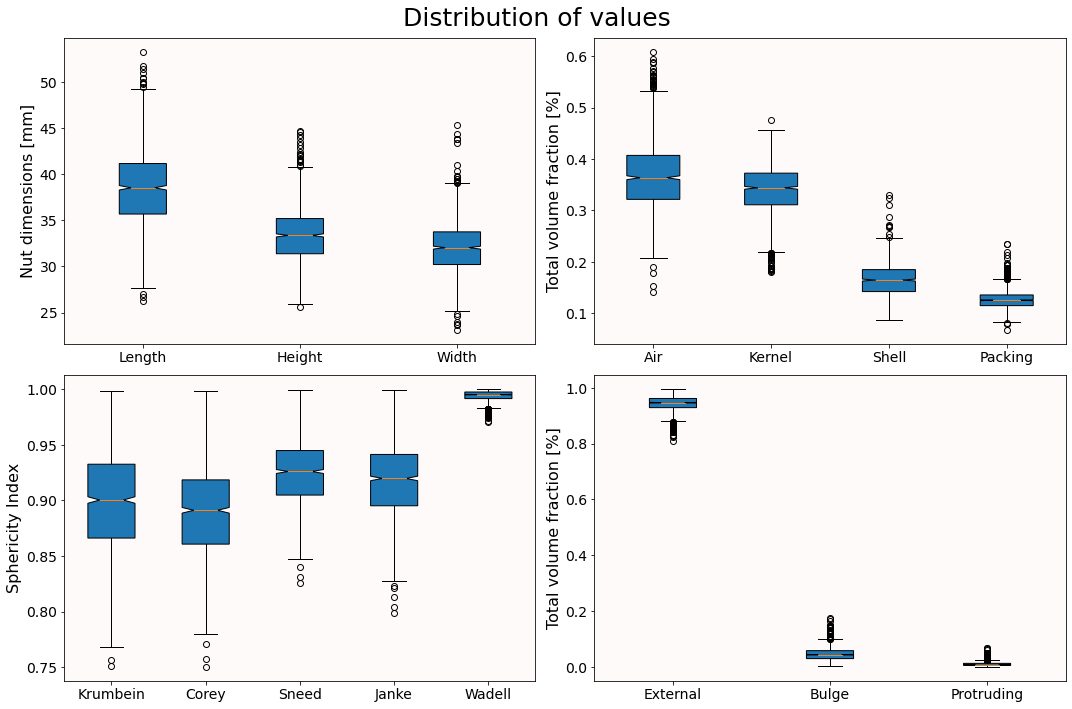

In [40]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = np.atleast_1d(ax).ravel()

idx=0
ss=np.s_[2:5]; labels = [(s.split(' ')[1]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Nut dimensions [mm]', fontsize=fs+2)
idx+=1; 

ss=np.s_[26:30]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Total volume fraction [%]', fontsize=fs+2)
idx+=1; 

ss=np.s_[17:22]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, vert=True, notch=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Sphericity Index', fontsize=fs+2)
idx+=1; 

ss=np.s_[35:38]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(df.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Total volume fraction [%]', fontsize=fs+2)
idx+=1; 

for idx in range(len(ax)):
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle('Distribution of values', fontsize=25)
fig.tight_layout()

filename = dst + 'nutdim_volratio_sphericty_box_plots'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# Correlation

../../writing/walnut_figs/spearman_correlation


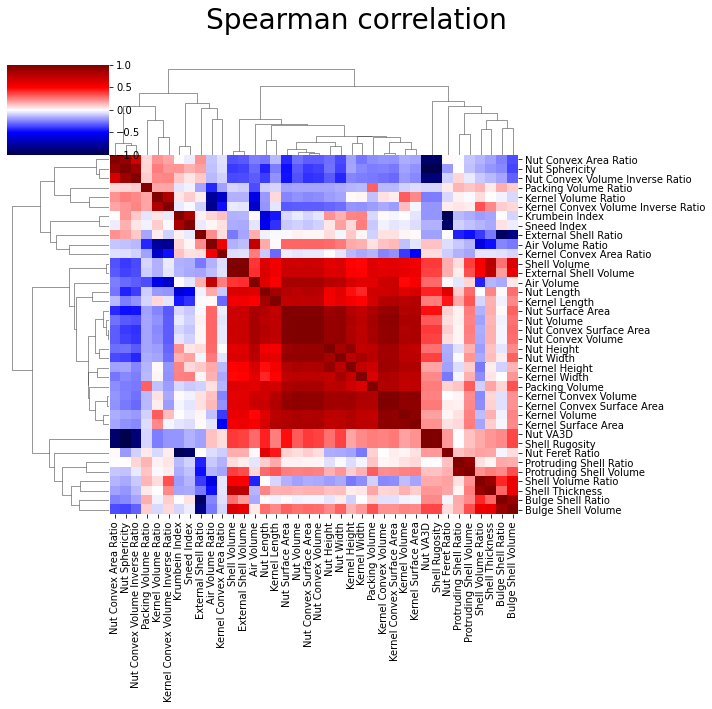

In [324]:
vmin, vmax = -1,1
cmap = 'seismic'
foo = pd.DataFrame(scorrstat, columns=new_col_labels[2:], index=new_col_labels[2:])

#plt.figure(figsize=(18,18));
sns.clustermap(foo, vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28);

filename = dst + 'spearman_correlation'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=200, format='pdf', bbox_inches='tight')

../../writing/walnut_figs/pearson_correlation


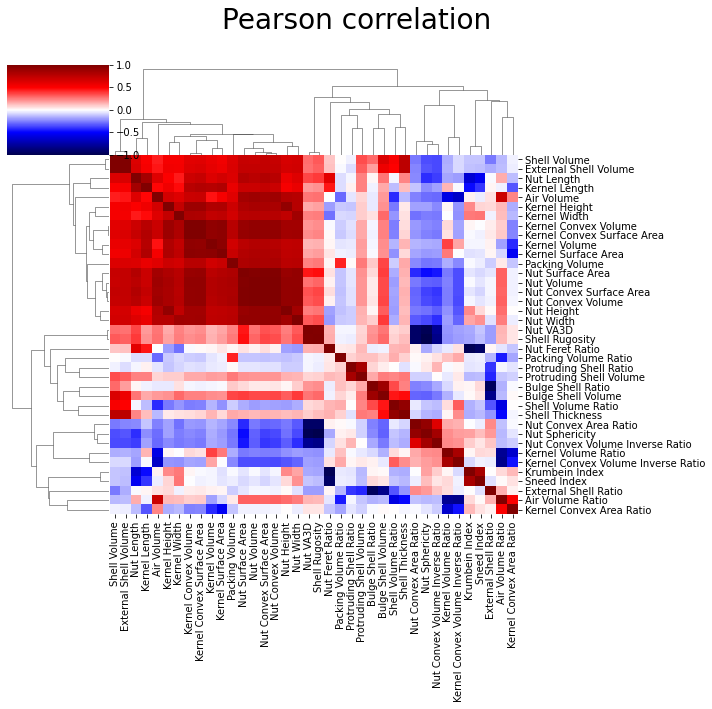

In [325]:
vmin, vmax = -1,1
cmap = 'seismic'
foo = pd.DataFrame(pcorrstat, columns=new_col_labels[2:], index=new_col_labels[2:])

#plt.figure(figsize=(18,18));
sns.clustermap(foo, vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28);

filename = dst + 'pearson_correlation'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=200, format='pdf', bbox_inches='tight')

# Link to categorical traits from Pat Brown

In [326]:
fs = 15
marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong


cattraitnames = ['EaseOfRemoval',
                 'ShellStrength',
                 'ShellTexture',
                 'ShellIntegrity',
                 'ShellColor',
                 'SEAL',
                 'PackingTissue',
                 'KernelFill',
                 'Plumpness']

# PCA

In [329]:
imgfeats = new_df.iloc[:,2:len(new_col_labels)].values.copy()
scaler = prep.StandardScaler().fit(imgfeats)
imgfeats = scaler.transform(imgfeats)
print(imgfeats.shape)

(1264, 38)


In [330]:
pca = decomp.PCA(n_components=2, svd_solver='full')
pca.fit(imgfeats)

print(100*pca.explained_variance_ratio_[:10])
print(pca.singular_values_[:10])
print(100*np.cumsum(pca.explained_variance_ratio_)[:10])

redux = pca.transform(imgfeats)
print(redux.shape)

[39.90892954 13.17194545]
[138.45236378  79.54086269]
[39.90892954 53.08087499]
(1264, 2)


../../writing/walnut_figs/PCA_trait_scatter


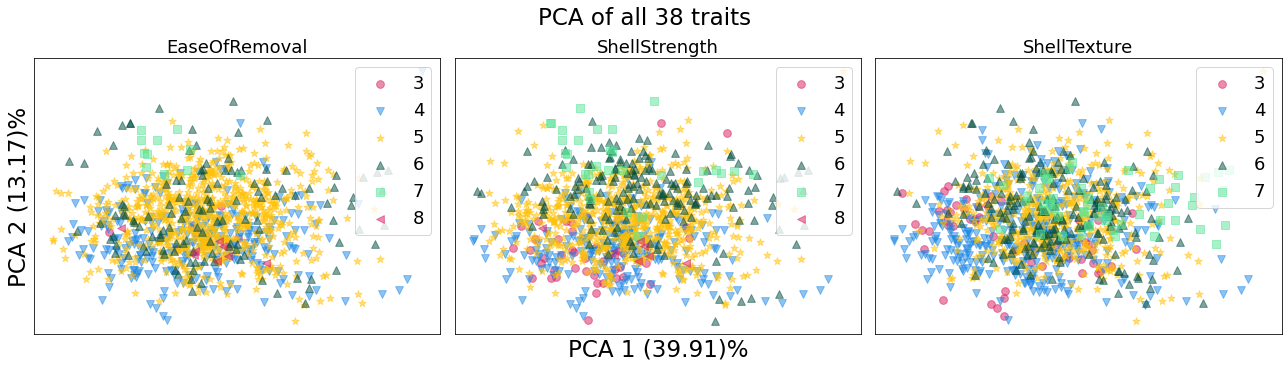

In [338]:
fs = 18
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(redux[mask,0],
                        redux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=.5, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);
    
for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

ax[1].set_xlabel('PCA 1 ({:.2f})%'.format(pca.explained_variance_ratio_[0]*100), fontsize=fs+5)
ax[0].set_ylabel('PCA 2 ({:.2f})%'.format(pca.explained_variance_ratio_[1]*100), fontsize=fs+5);

fig.suptitle('PCA of all {} traits'.format(imgfeats.shape[1]), fontsize = fs+5)
fig.tight_layout();

filename = dst + 'PCA_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [80]:
foo = np.sqrt(pca.components_[0]**2 + pca.components_[1]**2)
sortarr = np.argsort(foo)[::-1]
sort_labels = np.asarray(col_labels)[sortarr]
for i in range(10):
    print(i+1, np.round(foo[sortarr[i]],2), sort_labels[i], sep='\t')

1	0.28	Nut Volume
2	0.28	Nut VA3D
3	0.28	Nut Convex Area Inverse Ratio
4	0.27	Sneed Index
5	0.27	Corey Index
6	0.26	Krumbein Index
7	0.26	Nut Convex Volume Inverse Ratio
8	0.25	Nut Length
9	0.25	Nut Feret Ratio
10	0.25	Nut Sphericity


../../webpage/walnuts/figs/PCA_loadings_h


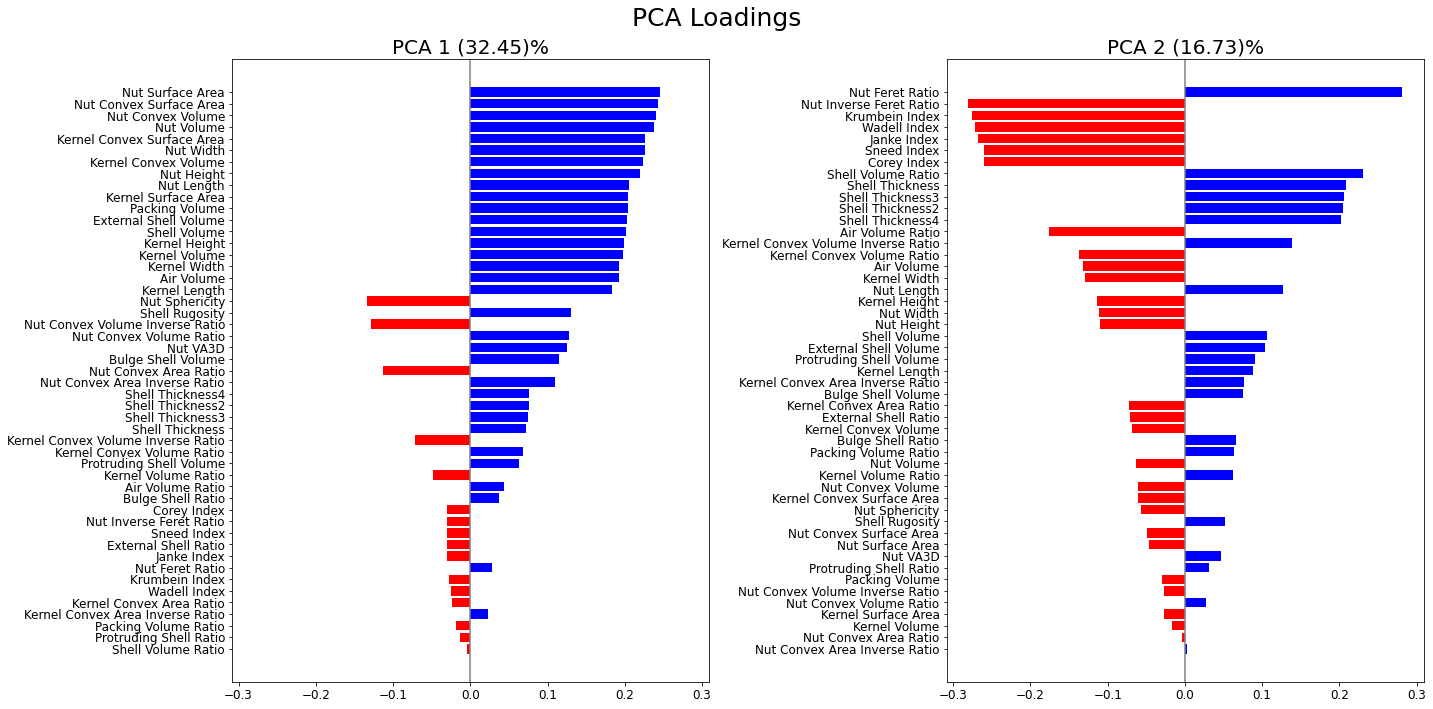

In [119]:
fs = 12
fig, ax = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=False)
ax = np.atleast_1d(ax).ravel()

idx = 0
#ax[idx].set_ylabel('PCA Loadings', fontsize=fs)

for idx in range(len(ax)):
    sortarr = np.argsort(np.abs(pca.components_[idx]))
    plus = np.where(pca.components_[idx][sortarr] > 0)[0]
    minus = np.where(pca.components_[idx][sortarr] < 0)[0]

    ax[idx].barh(plus, pca.components_[idx][sortarr][plus], color='b')
    ax[idx].barh(minus, pca.components_[idx][sortarr][minus], color='r')
    ax[idx].axvline(0, c='gray')
    ax[idx].set_yticks(range(len(pca.components_[idx])))
    ax[idx].set_yticklabels(scol_labels[sortarr+2]);
    ax[idx].tick_params('x', labelrotation=0, labelsize=fs);
    ax[idx].tick_params('y', labelsize=fs);
    ax[idx].set_title('PCA {} ({:.2f})%'.format(idx+1, pca.explained_variance_ratio_[idx]*100), fontsize=20)

fig.suptitle('PCA Loadings', fontsize=25)
fig.tight_layout();

filename = dst + 'PCA_loadings_h'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# KPCA

In [332]:
kpca = decomp.KernelPCA(n_components=2, 
                        kernel='rbf', 
                        gamma = 0.05, 
                        degree = 3,
                        coef0 = 1,
                        fit_inverse_transform=False, eigen_solver='dense')
kredux = kpca.fit_transform(imgfeats)
print(kredux.shape)

(1264, 2)


../../writing/walnut_figs/KPCA_rbf_trait_scatter


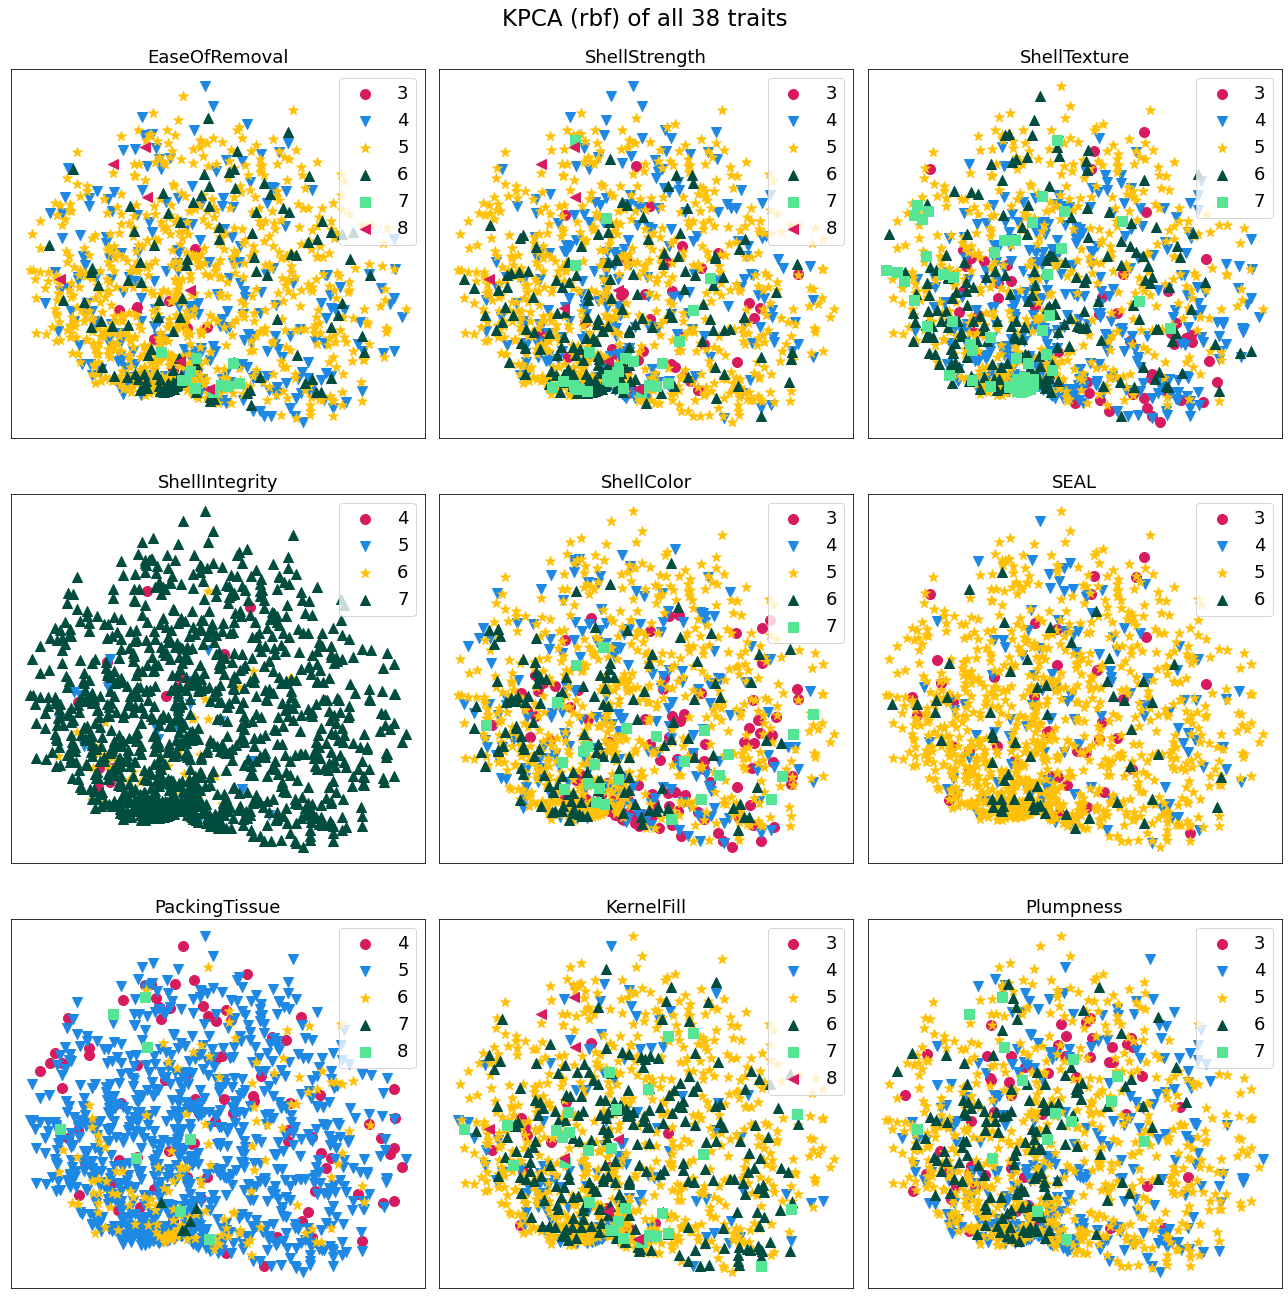

In [349]:
fs = 18
fig, ax = plt.subplots(3,3, figsize=(18,18.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(kredux[mask,0],
                        kredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=100, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('KPCA (rbf) of all 38 traits', fontsize = fs+5, y=.99)
fig.tight_layout();

filename = dst + 'KPCA_rbf_trait_scatter'
print(filename)
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Isomap

In [339]:
iso = mfold.Isomap(n_components=2, n_neighbors=16)
iredux = iso.fit_transform(imgfeats)
print(iredux.shape)

(1264, 2)


../../writing/walnut_figs/isomap_trait_scatter


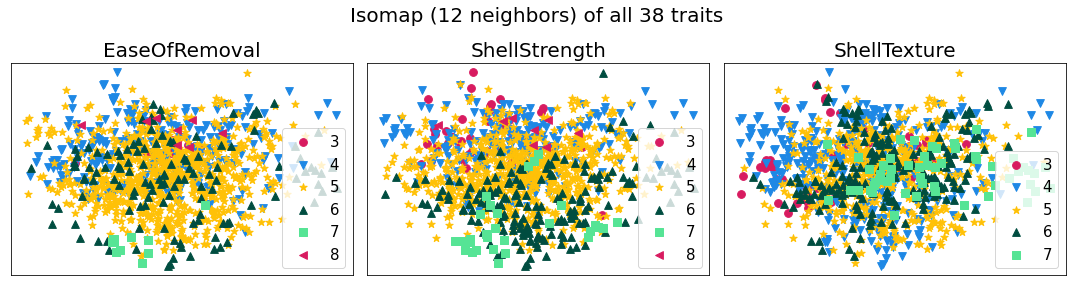

In [348]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(iredux[mask,0],
                        iredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=20);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Isomap (12 neighbors) of all 38 traits', fontsize = fs+5, y=.91)
fig.tight_layout();

filename = dst + 'isomap_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# LLE

(1264, 2)
../../writing/walnut_figs/lle_trait_scatter


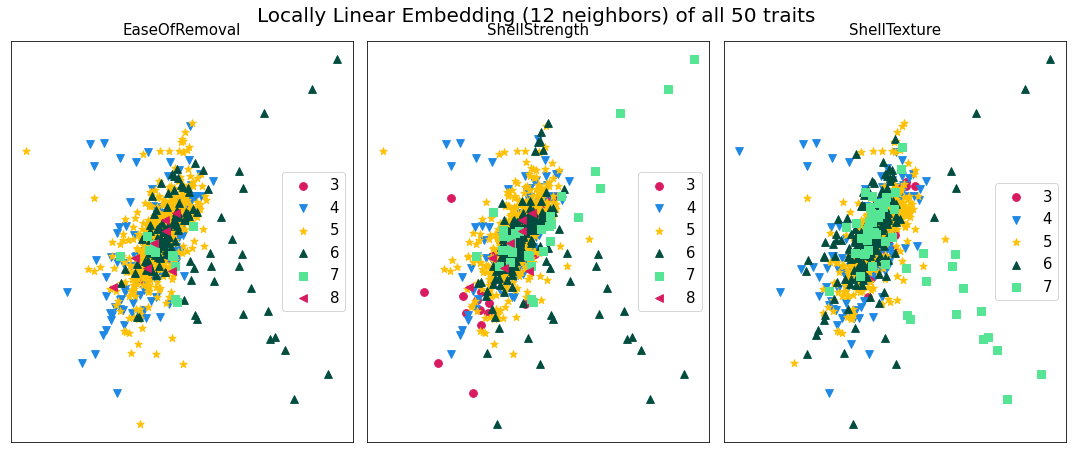

In [341]:
lle = mfold.LocallyLinearEmbedding(n_components=2, n_neighbors=12)
lredux = lle.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,6.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(lredux[mask,0],
                        lredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Locally Linear Embedding (12 neighbors) of all 50 traits', fontsize = fs+5, y=.97)
fig.tight_layout();

filename = dst + 'lle_trait_scatter'
print(filename)
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Spectral Embedding

(1264, 2)
../../writing/walnut_figs/se_trait_scatter


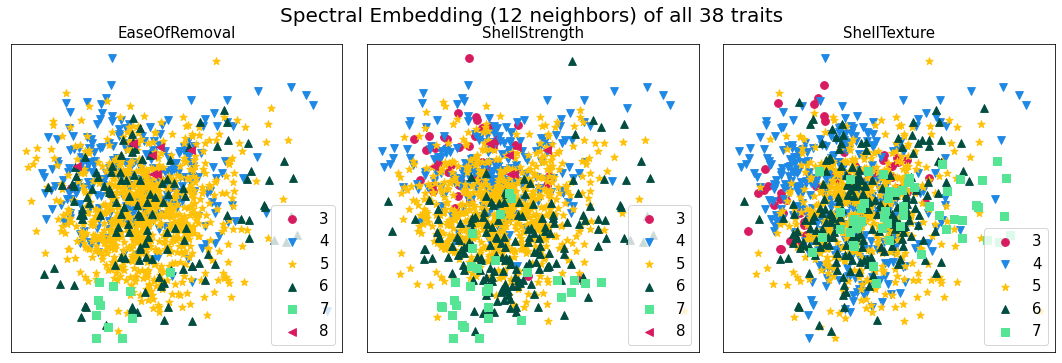

In [347]:
se = mfold.SpectralEmbedding(n_components=2,
                             affinity = 'rbf', #nearest_neighbors,
                             gamma = 0.005,
                             n_neighbors = 22)

sredux = se.fit_transform(imgfeats)
print(lredux.shape)

fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(sredux[mask,0],
                        sredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Spectral Embedding (12 neighbors) of all 38 traits', fontsize = fs+5, y=.99)
fig.tight_layout();

filename = dst + 'se_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# MDS

In [193]:
mds = mfold.MDS(n_components=2, metric=True,
                n_init = 10, dissimilarity='euclidean')

mredux = mds.fit_transform(imgfeats)

../../webpage/walnuts/figs/mds_trait_scatter


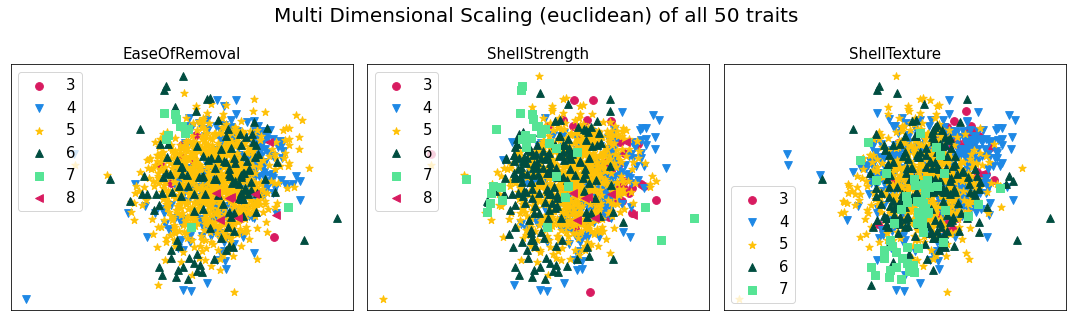

In [197]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(mredux[mask,0],
                        mredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('Multi Dimensional Scaling (euclidean) of all 50 traits', fontsize = fs+5, y=.96)
fig.tight_layout();

filename = dst + 'mds_trait_scatter'
print(filename)
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# t-SNE

In [345]:
tredux = mfold.TSNE(n_components=2, perplexity=12, early_exaggeration=20).fit_transform(imgfeats)

../../writing/walnut_figs/tsne_trait_scatter


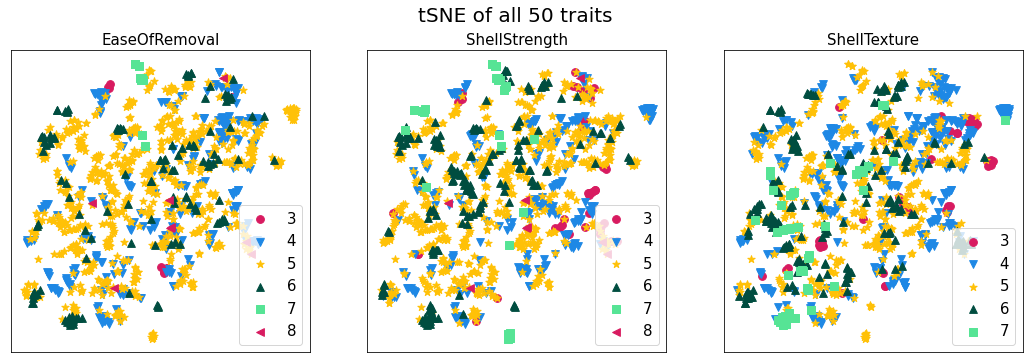

In [346]:
fs = 15
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    cattraitname = cattraitnames[idx]
    cattrait = np.sort(pd.unique(df[cattraitname]))[1:]
    cattrait = cattrait.astype(int)
    
    for k in range(len(cattrait)):
        mask = df[cattraitname] == cattrait[k]
        ax[idx].scatter(tredux[mask,0],
                        tredux[mask,1],
                        color=col_wong[k], marker=marker[k], s=60, alpha=1, label=cattrait[k])
    ax[idx].legend(fontsize=fs);
    ax[idx].set_title(cattraitname, fontsize=fs);

for i in range(len(ax)):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    for spine in ax[i].spines.values():
        spine.set_visible(True)
    ax[i].set_aspect('equal')

fig.suptitle('tSNE of all 50 traits', fontsize = fs+5, y=.99)
fig.tight_layout();

filename = dst + 'tsne_trait_scatter'
print(filename)
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})